# **Handling Source Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Canada Case Data 
[ccodwg/CovidTimelineCanada: A definitive dataset for COVID-19 in Canada.](https://github.com/ccodwg/CovidTimelineCanada)

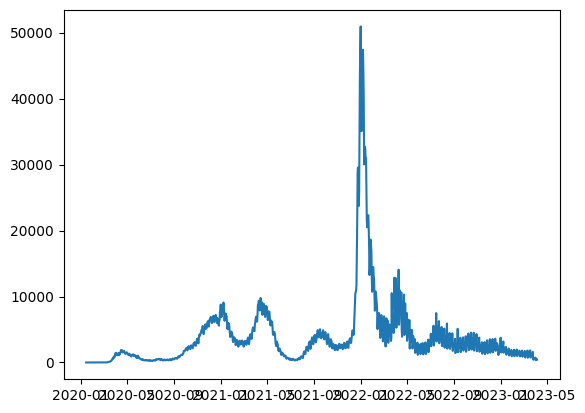

In [2]:
caseurl="https://raw.githubusercontent.com/ccodwg/CovidTimelineCanada/main/data/can/cases_can.csv"
casesource=pd.read_csv(caseurl)
casesource["date"]=pd.to_datetime(casesource["date"])
casesource.index=casesource["date"]
plt.plot(casesource.loc[:,"date"],casesource.loc[:,"value_daily"])

In [3]:
casesource

,name,region,date,value,value_daily
date,,,,,
2020-01-15,cases,CAN,2020-01-15,0,0
2020-01-16,cases,CAN,2020-01-16,0,0
2020-01-17,cases,CAN,2020-01-17,0,0
2020-01-18,cases,CAN,2020-01-18,0,0
2020-01-19,cases,CAN,2020-01-19,0,0
...,...,...,...,...,...
2023-04-01,cases,CAN,2023-04-01,4571653,737
2023-04-02,cases,CAN,2023-04-02,4572008,355
2023-04-03,cases,CAN,2023-04-03,4572371,363


In [4]:
dailycase=casesource['2021-01-01':'2022-12-30']
dailycase

,name,region,date,value,value_daily
date,,,,,
2021-01-01,cases,CAN,2021-01-01,590918,7522
2021-01-02,cases,CAN,2021-01-02,597800,6882
2021-01-03,cases,CAN,2021-01-03,605405,7605
2021-01-04,cases,CAN,2021-01-04,612708,7303
2021-01-05,cases,CAN,2021-01-05,620572,7864
...,...,...,...,...,...
2022-12-26,cases,CAN,2022-12-26,4427733,1297
2022-12-27,cases,CAN,2022-12-27,4429625,1892
2022-12-28,cases,CAN,2022-12-28,4432254,2629


# M,C data

In [5]:

def getseries(mctype,url,column):
    source=pd.read_csv(url)
    mctypedata=source[source["Classify"]==mctype]
    return mctypedata.groupby(["Date"])[column].sum()

def getseriesnumber(mctype,url,column):
    source=pd.read_csv(url)
    mctypedata=source[source["Classify"]==mctype]
    return mctypedata.groupby(["Date"])[column].count()

In [6]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [12]:
url_bert="/content/drive/My Drive/Misinformation_Project/Audience_Influence_Score_30K_vaccine_21_22.csv"
column1="Audience Influence"
column2="Overall Impact"
bert_vaccine1_M = getseries("M",url_bert,column1)
bert_vaccine2_M = getseries("M",url_bert,column2)
bert_vaccine1_C = getseries("C",url_bert,column1)
bert_vaccine2_C = getseries("C",url_bert,column2)
numberbert_vaccine1_M = getseriesnumber("M",url_bert,column1)
numberbert_vaccine2_M = getseriesnumber("M",url_bert,column2)
numberbert_vaccine1_C = getseriesnumber("C",url_bert,column1)
numberbert_vaccine2_C = getseriesnumber("C",url_bert,column2)

url_bert_interventions="/content/drive/My Drive/Misinformation_Project/Audience_Influence_Score_30K_interventions_21_22.csv"
bert_interventions1_M = getseries("M",url_bert_interventions,column1)
bert_interventions2_M = getseries("M",url_bert_interventions,column2)
bert_interventions1_C = getseries("C",url_bert_interventions,column1)
bert_interventions2_C = getseries("C",url_bert_interventions,column2)
numberbert_interventions1_M = getseriesnumber("M",url_bert_interventions,column1)
numberbert_interventions2_M = getseriesnumber("M",url_bert_interventions,column2)
numberbert_interventions1_C = getseriesnumber("C",url_bert_interventions,column1)
numberbert_interventions2_C = getseriesnumber("C",url_bert_interventions,column2)

In [13]:
Mnumbervac=pd.DataFrame()
Mnumbervac.index=pd.to_datetime(numberbert_vaccine1_M.index)
Mnumbervac["Mnumvac"]=numberbert_vaccine1_M.values
Mnumbervac=Mnumbervac.resample("D").mean().fillna(method="pad")
Cnumbervac=pd.DataFrame()
Cnumbervac.index=pd.to_datetime(numberbert_vaccine1_C.index)
Cnumbervac["Cnumvac"]=numberbert_vaccine1_C.values
Cnumbervac=Cnumbervac.resample("D").mean().fillna(method="pad")
Cnumbervac

,Cnumvac
Date,
2021-01-01,4.0
2021-01-02,2.0
2021-01-03,1.0
2021-01-04,7.0
2021-01-05,10.0
...,...
2022-12-26,1.0
2022-12-27,1.0
2022-12-28,1.0


# Merge to new CSV

In [14]:
data=pd.DataFrame()
data.index=dailycase.index
data["dailycase"]=pd.to_numeric(dailycase["value_daily"]).astype('float64')
data["acccase"]=pd.to_numeric(dailycase["value"]).astype('float64')
data["Mnuminter"]=pd.to_numeric(numberbert_interventions1_M.values).astype('float64')
data["Cnuminter"]=pd.to_numeric(numberbert_interventions1_C.values).astype('float64')
data["Mnumvac"]=Mnumbervac["Mnumvac"]
data["Cnumvac"]=Cnumbervac["Cnumvac"]
data

,dailycase,acccase,Mnuminter,Cnuminter,Mnumvac,Cnumvac
date,,,,,,
2021-01-01,7522.0,590918.0,23.0,27.0,15.0,4.0
2021-01-02,6882.0,597800.0,29.0,16.0,10.0,2.0
2021-01-03,7605.0,605405.0,38.0,17.0,10.0,1.0
2021-01-04,7303.0,612708.0,24.0,18.0,32.0,7.0
2021-01-05,7864.0,620572.0,22.0,15.0,62.0,10.0
...,...,...,...,...,...,...
2022-12-26,1297.0,4427733.0,23.0,21.0,6.0,1.0
2022-12-27,1892.0,4429625.0,24.0,26.0,10.0,1.0
2022-12-28,2629.0,4432254.0,23.0,15.0,4.0,1.0


# Data Smoothing and Data Normilization

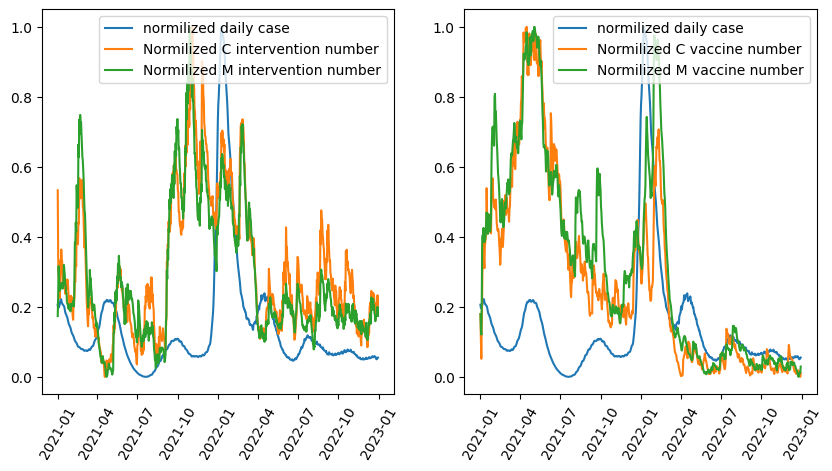

In [15]:
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())     
    return df_norm

def roll_smoothing(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = df_norm[column].rolling(window=7).mean()     
    return df_norm
def ewm_smoothing(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = df_norm[column].ewm(span=20).mean()     
    return df_norm


datasmoothing=ewm_smoothing(data)
datanorm=min_max_scaling(datasmoothing)
datanorm.to_csv("/content/drive/My Drive/Misinformation_Project/datanorm.csv")
datasmoothing.to_csv("/content/drive/My Drive/Misinformation_Project/datasmoothing.csv")
data.to_csv("/content/drive/My Drive/Misinformation_Project/data.csv")

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(datanorm["dailycase"], label="normilized daily case")
plt.plot(datanorm["Cnuminter"], label="Normilized C intervention number")
plt.plot(datanorm["Mnuminter"], label="Normilized M intervention number")
#plt.plot(datanorm["Cnumvac"], label="Normilized C vaccine number")
#plt.plot(datanorm["Mnumvac"], label="Normilized M vaccine number")
#plt.plot(casedataontario["SummaryDate"][1:],dailycases,label="Case data")
plt.xticks(rotation=60)
plt.legend()
plt.subplot(1,2,2)
plt.plot(datanorm["dailycase"], label="normilized daily case")
#plt.plot(datanorm["Cnuminter"], label="Normilized C intervention number")
#plt.plot(datanorm["Mnuminter"], label="Normilized M intervention number")
plt.plot(datanorm["Cnumvac"], label="Normilized C vaccine number")
plt.plot(datanorm["Mnumvac"], label="Normilized M vaccine number")
#plt.plot(casedataontario["SummaryDate"][1:],dailycases,label="Case data")
plt.xticks(rotation=60)
plt.legend()

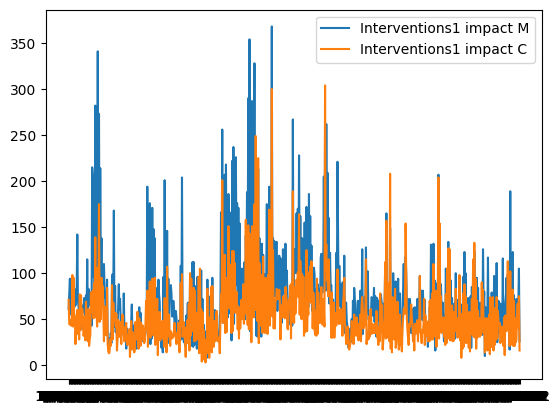

In [17]:
plt.plot(bert_interventions1_M, label="Interventions1 impact M")
plt.plot(bert_interventions1_C, label="Interventions1 impact C")
plt.legend()

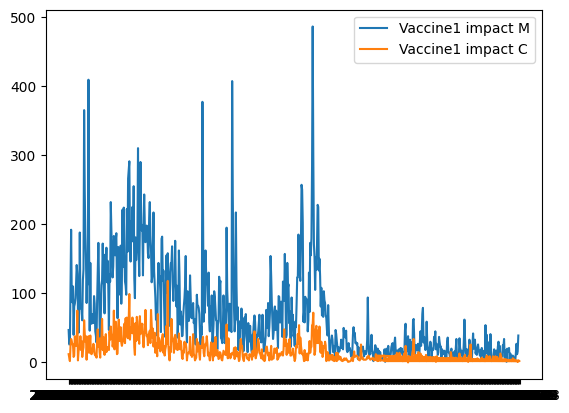

In [22]:
plt.plot(bert_vaccine1_M, label="Vaccine1 impact M")
plt.plot(bert_vaccine1_C, label="Vaccine1 impact C")
plt.legend()

Date
1/1/2021      61
1/1/2022      78
1/10/2021     94
1/10/2022     69
1/11/2021     55
            ... 
9/7/2022      59
9/8/2021      58
9/8/2022      66
9/9/2021     105
9/9/2022      26
Name: Audience Influence, Length: 729, dtype: int64


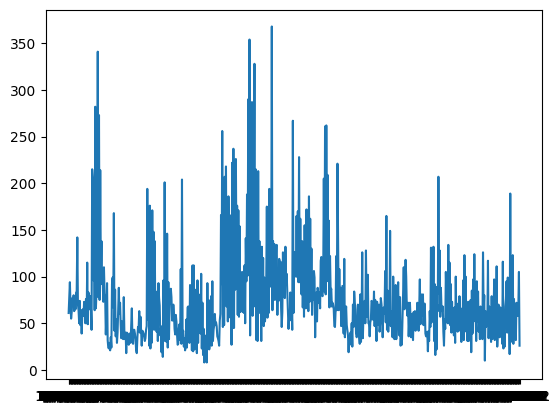

In [18]:
print(bert_interventions1_M)
plt.plot(bert_interventions1_M)

Date
1/1/2021     23
1/1/2022     29
1/10/2021    38
1/10/2022    24
1/11/2021    22
             ..
9/7/2022     23
9/8/2021     24
9/8/2022     23
9/9/2021     37
9/9/2022     10
Name: Audience Influence, Length: 729, dtype: int64


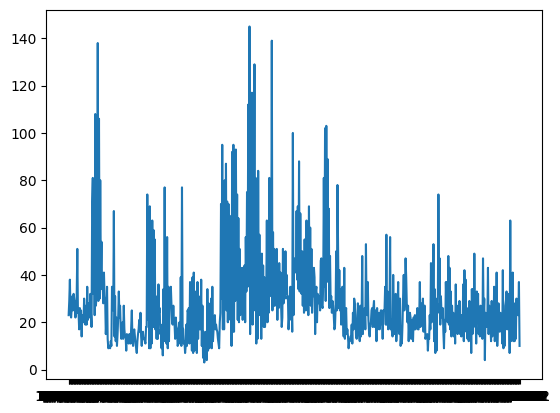

In [19]:
print(numberbert_interventions1_M)
plt.plot(numberbert_interventions1_M)

Date
2021-01-01    -45.354848
2021-01-02     -8.860417
2021-01-03     -9.567995
2021-01-04     10.724192
2021-01-05   -102.203074
                 ...    
2022-12-26     -5.433333
2022-12-27    -23.138745
2022-12-28    -12.497222
2022-12-29     13.533730
2022-12-30     26.923214
Name: Overall Impact, Length: 727, dtype: float64


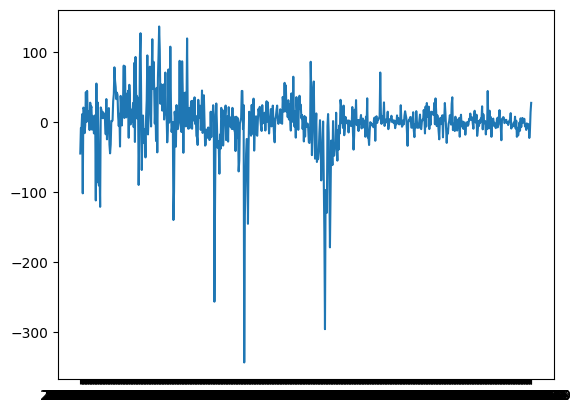

In [20]:
print(bert_vaccine2_M)
plt.plot(bert_vaccine2_M)

Date
2021-01-01    15
2021-01-02    10
2021-01-03    10
2021-01-04    32
2021-01-05    62
              ..
2022-12-26     6
2022-12-27    10
2022-12-28     4
2022-12-29     6
2022-12-30    16
Name: Audience Influence, Length: 727, dtype: int64


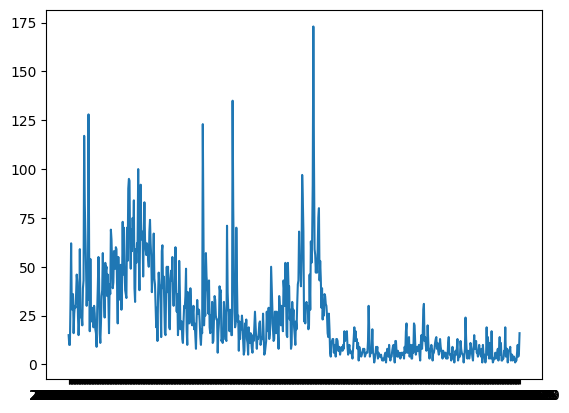

In [21]:
print(numberbert_vaccine1_M)
plt.plot(numberbert_vaccine1_M)